<a href="https://colab.research.google.com/github/JulioHenri/freelance_TCC_Odontologia/blob/main/analise_fatorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

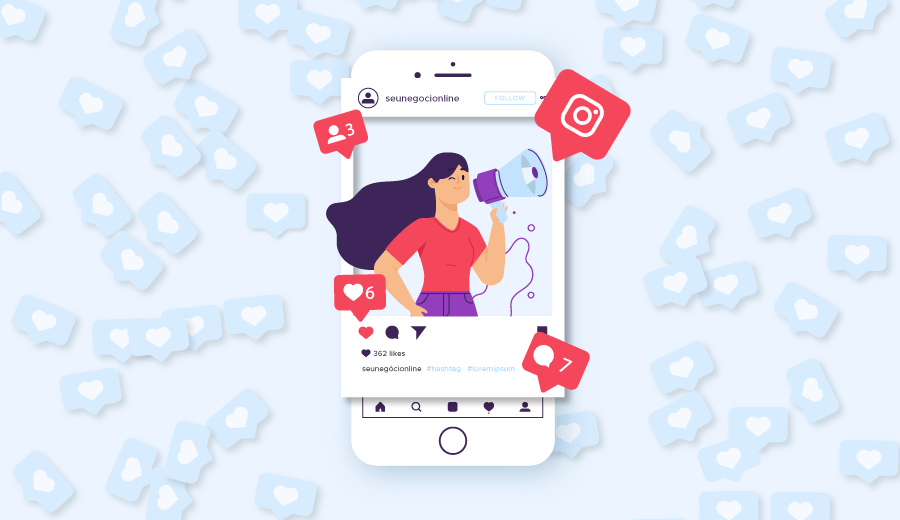

O Instagram é uma rede social criada em 2010 e que é bem famosa entre os jovens no mundo todo. A partir dela é possível compartilhar fotos e vídeos do seu dia-a-dia até buscar contatos mais profissionais, a utilizando como ferramenta para divulgar seus produtos e serviços e fazer uma aproximação com seu público.

Dito isso, muitos profissionais a usam como ferramenta de marketing digital, no intuito de usar estratégias para obter clientes e conquistar uma audiência fiel. 

Para entender a importância do marketing no Instagram para os profissionais cirugiões-dentistas, utilizei de métodos estatísticos para criar um relatório com resultados e insights a respeito do assunto. 

Este notebook fez parte de um trabalho de TCC de um estudante de odontologia. 

# Importando bibliotecas e lendo os dados

In [ ]:
#instalando pacote necessário
!pip install factor_analyzer==0.3.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

from scipy import stats
from scipy.stats import chisquare

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_excel('dataset.xlsx')
#df = pd.read_csv('dataset.csv', sep=';')
df.columns=['q1','q2','q3','q4','q5','q6','q7']
df.head()

,q1,q2,q3,q4,q5,q6,q7
0,3 (Moderado),4 (Muito),5 (Totalmente),5 (Totalmente),5 (Totalmente),4 (Muito),4 (Muito)
1,4 (Muito),3 (Moderado),4 (Muito),4 (Muito),4 (Muito),4 (Muito),4 (Muito)
2,4 (Muito),5 (Totalmente),4 (Muito),4 (Muito),5 (Totalmente),4 (Muito),4 (Muito)
3,1 (Nada),1 (Nada),2 (Pouco),2 (Pouco),1 (Nada),1 (Nada),1 (Nada)
4,2 (Pouco),4 (Muito),3 (Moderado),5 (Totalmente),5 (Totalmente),4 (Muito),2 (Pouco)


In [ ]:
df.replace('1 (Nada)',1, inplace = True)
df.replace('2 (Pouco)',2, inplace = True)
df.replace('3 (Moderado)',3, inplace = True)
df.replace('4 (Muito)',4, inplace = True)
df.replace('5 (Totalmente)',5, inplace = True)

# Análise Fatorial

A Análise Fatorial Exploratória é uma técnica estatística multivariada, isto é, avalia-se duas ou mais medidas e/ou variáveis sobre o objeto de interesse. O objetivo da AFE é estimar e identificar a dimensionalidade de indicadores e o menor número de traços latentes que explica o padrão das correlações (Osborne, 2014). No estudo em questão, essa ferramenta se fez necessária para que pudesse observar melhor como os fatores se relacionam com cada item

Um dos pré-requisitos para escolha da quantidade de fatores é que seu autovalores não sejam muito menores que 1, conforme visto abaixo, deve ser escohido 2 fatores.

In [ ]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(df)

# Checando autovalores
ev, v = fa.get_eigenvalues()
ev

array([3.24938455, 1.12777272, 0.77386273, 0.63412028, 0.50052917,
       0.38391569, 0.33041486])

confirmando agora de maneira visual, quanto mais horizontal a linha, menos é recomendado a utilização de tal como fator.

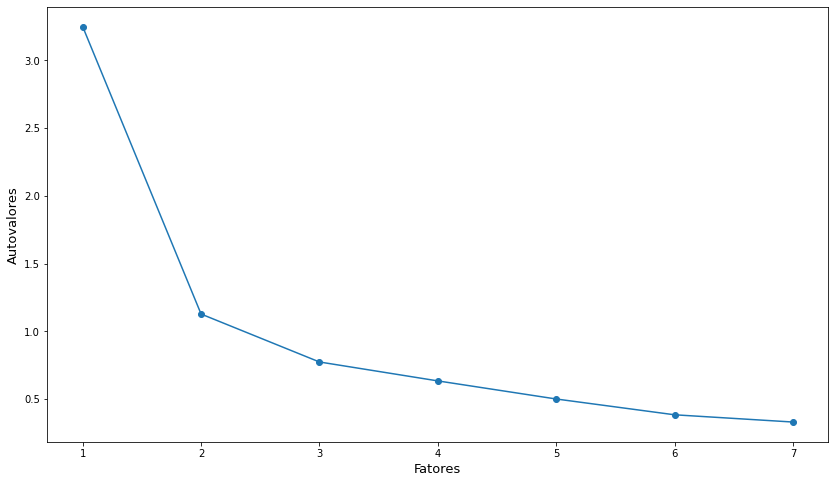

In [ ]:
#análise paralela
# Criando scree plot 

plt.figure(figsize=(14,8))
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.xlabel('Fatores', fontsize=13)
plt.ylabel('Autovalores', fontsize=13)

plt.show()

Então, as variáveis foram redimensionadas em 2 fatores comuns por meio do Common Factor Model que observa a covariância entre os atributos que diz o grau de relacionamento de cada item do questionário para com cada fator, tais registros são chamados de cargas fatoriais.

A decisão sobre o número de fatores a ser retido foi realizada, não só, por meio da técnica da Análise Paralela com permutação aleatória dos dados observados, como também pela checagem dos autovalores dos atributos.

## Análise fatorial 

In [ ]:
#atualizando
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

## Matriz L de cargas fatoriais estimadas

In [ ]:
#coeficientes do modelo de análise fatorial
L = fa.loadings_
np.round(L,2)

array([[0.11, 0.57],
       [0.57, 0.09],
       [0.32, 0.67],
       [0.49, 0.57],
       [0.77, 0.35],
       [0.68, 0.26],
       [0.13, 0.52]])

In [ ]:
#transformando em dataframe para manipulação
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = df.columns
L.columns = ['FA1','FA2',]
L

,FA1,FA2
q1,0.108152,0.567404
q2,0.571643,0.086565
q3,0.316175,0.667611
q4,0.487841,0.569778
q5,0.770695,0.347540
q6,0.682143,0.262474
q7,0.132634,0.519298


In [ ]:
#organinzando por ordem crescente 
L.sort_values(by=['FA1'],ascending=False)


,FA1,FA2
q5,0.770695,0.347540
q6,0.682143,0.262474
q2,0.571643,0.086565
q4,0.487841,0.569778
q3,0.316175,0.667611
q7,0.132634,0.519298
q1,0.108152,0.567404


In [ ]:
L.sort_values(by='FA2',ascending=False)


,FA1,FA2
q3,0.316175,0.667611
q4,0.487841,0.569778
q1,0.108152,0.567404
q7,0.132634,0.519298
q5,0.770695,0.347540
q6,0.682143,0.262474
q2,0.571643,0.086565


Analisando as tabelas, pode-se concluir que as variáveis Q5 e Q6 têm maior relevância para o Fator 1, e são atributos que remetem a perguntas sobre importância das visualizações e curtidas no Instagram. Já em relação ao Fator 2, Q3 e Q4 são as mais relevantes, com valor 0,6676 e 0,5698, respectivamente. Tais atributos são relacionados com as publicações no Feed e no Story da referida rede social.

## Variância explicada por cada fator

In [ ]:
#variâncias
fa.get_factor_variance()

(array([1.75330848, 1.55913889]),
 array([0.25047264, 0.22273413]),
 array([0.25047264, 0.47320677]))

In [ ]:
np.sum(fa.get_factor_variance())


4.509333535588882

In [ ]:
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.38881765, 0.34575816],
       [0.05554538, 0.04939402],
       [0.05554538, 0.1049394 ]])

## Variância percentual explicada por cada fator

In [ ]:
np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)


array([[0.39, 0.35],
       [0.06, 0.05],
       [0.06, 0.1 ]])

O primeiro fator explica 39% da variável total dos dados e o segundo 35%. Nota-se que depois do segundo os valores explicados são pequenos.

Até agora foi resumido 7 atributos em 2 fatores  e abaixo mostrarei a utilidade dos fatores

In [ ]:
#adicionando os scores dos fatores ao dataset original
df[['Fator1','Fator2']] = np.array(fa.fit_transform(df))[:, 0:2]
df.head()

,q1,q2,q3,q4,q5,q6,q7,Fator1,Fator2
0,3,4,5,5,5,4,4,0.833701,1.219954
1,4,3,4,4,4,4,4,0.020347,0.990355
2,4,5,4,4,5,4,4,0.898786,0.761240
3,1,1,2,2,1,1,1,-2.188873,-1.294638
4,2,4,3,5,5,4,2,1.280709,-0.324868


In [ ]:
df.sort_values(by='Fator1',ascending=False).head(10)


,q1,q2,q3,q4,q5,q6,q7,Fator1,Fator2
12,2,4,2,3,5,5,2,1.481441,-1.272480
31,3,4,5,5,5,5,1,1.430135,0.403336
38,3,4,4,5,5,5,3,1.314461,0.503060
6,2,4,4,5,5,4,1,1.301960,-0.179126
17,2,4,3,5,5,4,2,1.280709,-0.324868
4,2,4,3,5,5,4,2,1.280709,-0.324868
7,2,4,3,5,5,4,2,1.280709,-0.324868
27,5,5,5,5,5,5,3,1.214187,1.336329
43,3,4,3,4,5,4,3,0.981666,-0.046016
63,2,4,3,3,4,5,2,0.922895,-0.853947


Quanto maior o score do Fator1, mais importante é considerado as visualizações e curtidas para o entrevistado.

In [ ]:
df.sort_values(by='Fator2',ascending=False).head(10)


,q1,q2,q3,q4,q5,q6,q7,Fator1,Fator2
18,5,4,5,5,4,3,4,-0.188472,1.870459
16,5,4,5,5,4,3,4,-0.188472,1.870459
66,4,2,5,5,5,3,3,0.110077,1.527978
27,5,5,5,5,5,5,3,1.214187,1.336329
24,4,4,4,5,4,2,4,-0.316647,1.287996
0,3,4,5,5,5,4,4,0.833701,1.219954
28,3,3,5,5,3,3,3,-0.552321,1.210258
1,4,3,4,4,4,4,4,0.020347,0.990355
15,4,3,4,5,4,4,3,0.207573,0.982981
13,4,3,4,5,4,4,3,0.207573,0.982981


Quanto maior o score do Fator2, mais importante é considerado as publicações no feed e no story para o entrevistado.

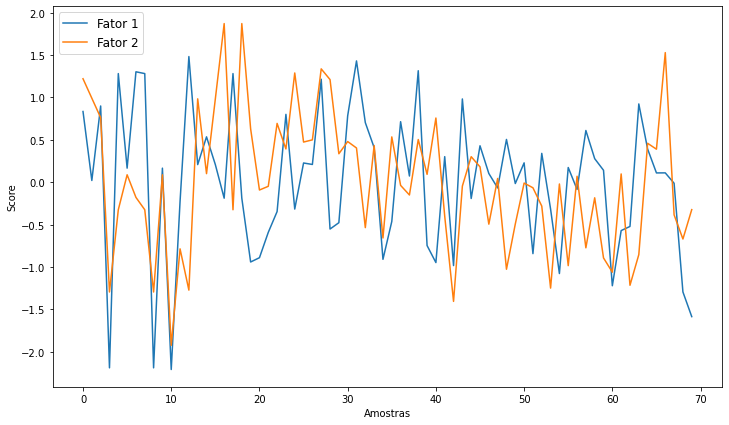

In [ ]:
plt.figure(figsize = (12, 7))

plt.plot(df['Fator1'], label = 'Fator 1')
plt.plot(df['Fator2'], label = 'Fator 2')

plt.legend(loc='upper left', prop = {'size': 12})
plt.xlabel('Amostras');
plt.ylabel('Score');



Em ambos os fatores há uma grande variabilidade nos Scores, sendo que para o Fator 2 há o pico máximo próximo ao valor 2 e mínimo próximo a -2 e para o Fator 1 o pico é aproximadamente 1,5 com o menor valor sendo menor que -2.

# Teste de confiabilidade (Consistência interna)

Consistência Interna refere-se a quão bem uma pesquisa, questionário ou teste realmente mede o que você deseja medir. Quanto maior a consistência interna, mais certeza você pode ter de que sua pesquisa é confiável

Motivos de se usar o alfa de cronbach para testar a confiabilidade do questionário:

I. O coeficiente alfa de Cronbach fornece uma medida razoável de confiabilidade em um único
teste. Dessa forma, não são necessárias repetições ou aplicações paralelas de um teste para a
estimativa da consistência do mesmo.

II. A fórmula geral do coeficiente alfa de Cronbach permite sua aplicação a questionários de
múltipla-escolha de escalas dicotômicas ou escalas atitudinais de variáveis categóricas politômicas.

III. O coeficiente alfa de Cronbach pode ser facilmente calculado por princípios estatísticos
básicos.

In [ ]:
#definindo uma função para fazer o alfa de cronbach

def cronbach_alpha(df):
  df_corr = df.corr() #matriz de correlação do df
  N = df.shape[1] #número de registros do df
  rs = np.array([])
  for i, col in enumerate(df_corr.columns):
    sum_ = df_corr[col][i+1:].values
    rs = np.append(sum_, rs)
  mean_r = np.mean(rs)

#usando a fórmula
  cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
  return cronbach_alpha 


In [ ]:
cronbach_alpha(df)

0.868459153227247

Valores entre 0.8 e 0.9 são considerados “Bons”, isto é, o questionário repassado para a realização deste estudo é estatisticamente confiável.

obs: o restante das análises foram feitas no SPSS.